In [48]:
# The datetime module used to work with dates as date objects.
import datetime
# The OS module in python provides functions for interacting with the operating system.
import os
# The shutil module in Python provides many functions of high-level operations on files and collections of files.
# This module helps in automating process of copying and removal of files and directories.
import shutil

# Here we'll import data processing libraries like Numpy, Pandas and Tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from jupyterthemes import jtplot
# Import pyplot package from matplotlib library
from matplotlib import pyplot as plt
# Import keras package from tensorflow library
from tensorflow import keras

# Import Sequential function from tensorflow.keras.models
from tensorflow.keras.models import Sequential
# Import Dense, DenseFeatures function from tensorflow.keras.layers
from tensorflow.keras.layers import Dense, DenseFeatures
# Import TensorBoard function from tensorflow.keras.callbacks
from tensorflow.keras.callbacks import TensorBoard

# Here we'll show the currently installed version of TensorFlow
print(tf.__version__)
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)


2.5.0


In [25]:
!ls *.csv

taxi-test.csv  taxi-train.csv  taxi-valid.csv


In [26]:
!head taxi*.csv

==> taxi-test.csv <==
6.0,2013-03-27 03:35:00 UTC,-73.977672,40.784052,-73.965332,40.801025,2,0
19.3,2012-05-10 18:43:16 UTC,-73.954366,40.778924,-74.004094,40.723104,1,1
7.5,2014-05-20 23:09:00 UTC,-73.999165,40.738377,-74.003473,40.723862,2,2
12.5,2015-02-23 19:51:31 UTC,-73.9652099609375,40.76948165893555,-73.98949432373047,40.739742279052734,1,3
10.9,2011-03-19 03:32:00 UTC,-73.99259,40.742957,-73.989908,40.711053,1,4
7.0,2012-09-18 12:51:11 UTC,-73.971195,40.751566,-73.975922,40.756361,1,5
19.0,2014-05-20 23:09:00 UTC,-73.998392,40.74517,-73.939845,40.74908,1,6
8.9,2012-07-18 08:46:08 UTC,-73.997638,40.756541,-73.973303,40.762019,1,7
4.5,2010-07-11 20:39:08 UTC,-73.976738,40.751321,-73.986671,40.74883,1,8
7.0,2013-12-12 02:16:40 UTC,-73.985024,40.767537,-73.981273,40.779302,1,9

==> taxi-train.csv <==
11.3,2011-01-28 20:42:59 UTC,-73.999022,40.739146,-73.990369,40.717866,1,0
7.7,2011-06-27 04:28:06 UTC,-73.987443,40.729221,-73.979013,40.758641,1,1
10.5,2011-04-03 00:54:53 UTC,-73.

In [39]:
import pandas as pd
taxi_df=pd.read_csv("taxi-train.csv",names=['fare_amount','pickup-date-time','pickup-longitude','pickup-latitude','drop-off-longitude','drop-off-latitude','passenger-count','key'])
taxi_df.head()

,fare_amount,pickup-date-time,pickup-longitude,pickup-latitude,drop-off-longitude,drop-off-latitude,passenger-count,key
0,11.3,2011-01-28 20:42:59 UTC,-73.999022,40.739146,-73.990369,40.717866,1,0
1,7.7,2011-06-27 04:28:06 UTC,-73.987443,40.729221,-73.979013,40.758641,1,1
2,10.5,2011-04-03 00:54:53 UTC,-73.982539,40.735725,-73.954797,40.778388,1,2
3,16.2,2009-04-10 04:11:56 UTC,-74.001945,40.740505,-73.913850,40.758559,1,3
4,33.5,2014-02-24 18:22:00 UTC,-73.993372,40.753382,-73.860900,40.732897,2,4


In [43]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7333 entries, 0 to 7332
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fare_amount         7333 non-null   float64
 1   pickup-date-time    7333 non-null   object 
 2   pickup-longitude    7333 non-null   float64
 3   pickup-latitude     7333 non-null   float64
 4   drop-off-longitude  7333 non-null   float64
 5   drop-off-latitude   7333 non-null   float64
 6   passenger-count     7333 non-null   int64  
 7   key                 7333 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 458.4+ KB


In [42]:
taxi_df.describe()

,fare_amount,pickup-longitude,pickup-latitude,drop-off-longitude,drop-off-latitude,passenger-count,key
count,7333.000000,7333.000000,7333.000000,7333.000000,7333.000000,7333.000000,7333.000000
mean,11.307645,-73.975200,40.751420,-73.974285,40.751567,1.644211,3666.000000
std,9.772298,0.036898,0.027542,0.038429,0.032020,1.263376,2116.999095
min,2.500000,-74.258183,40.608573,-74.260472,40.561076,1.000000,0.000000
25%,6.000000,-73.992248,40.737492,-73.991840,40.736033,1.000000,1833.000000
50%,8.500000,-73.982060,40.754062,-73.980887,40.753595,1.000000,3666.000000
75%,12.500000,-73.968562,40.767837,-73.965610,40.768190,2.000000,5499.000000
max,179.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,7332.000000


/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger-count', ylabel='count'>

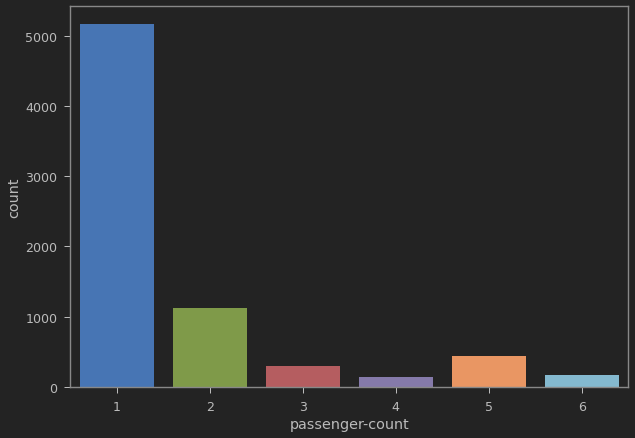

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(taxi_df['passenger-count'])

/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

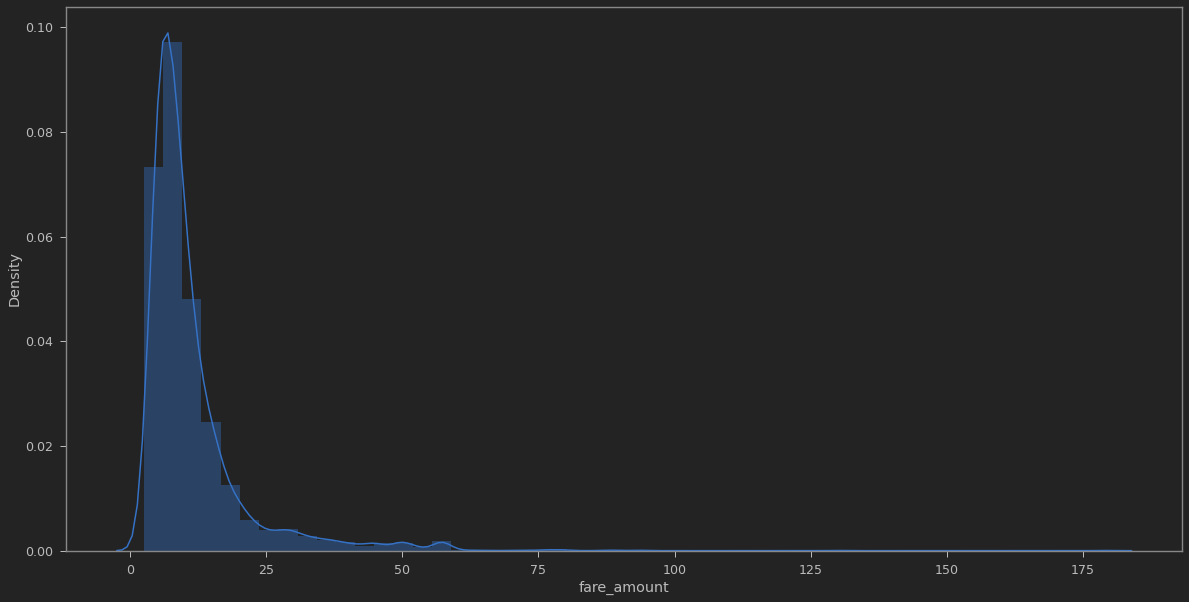

In [50]:
plt.figure(figsize=(20,10))
sns.distplot(taxi_df['fare_amount'])

<Figure size 2160x2160 with 0 Axes>

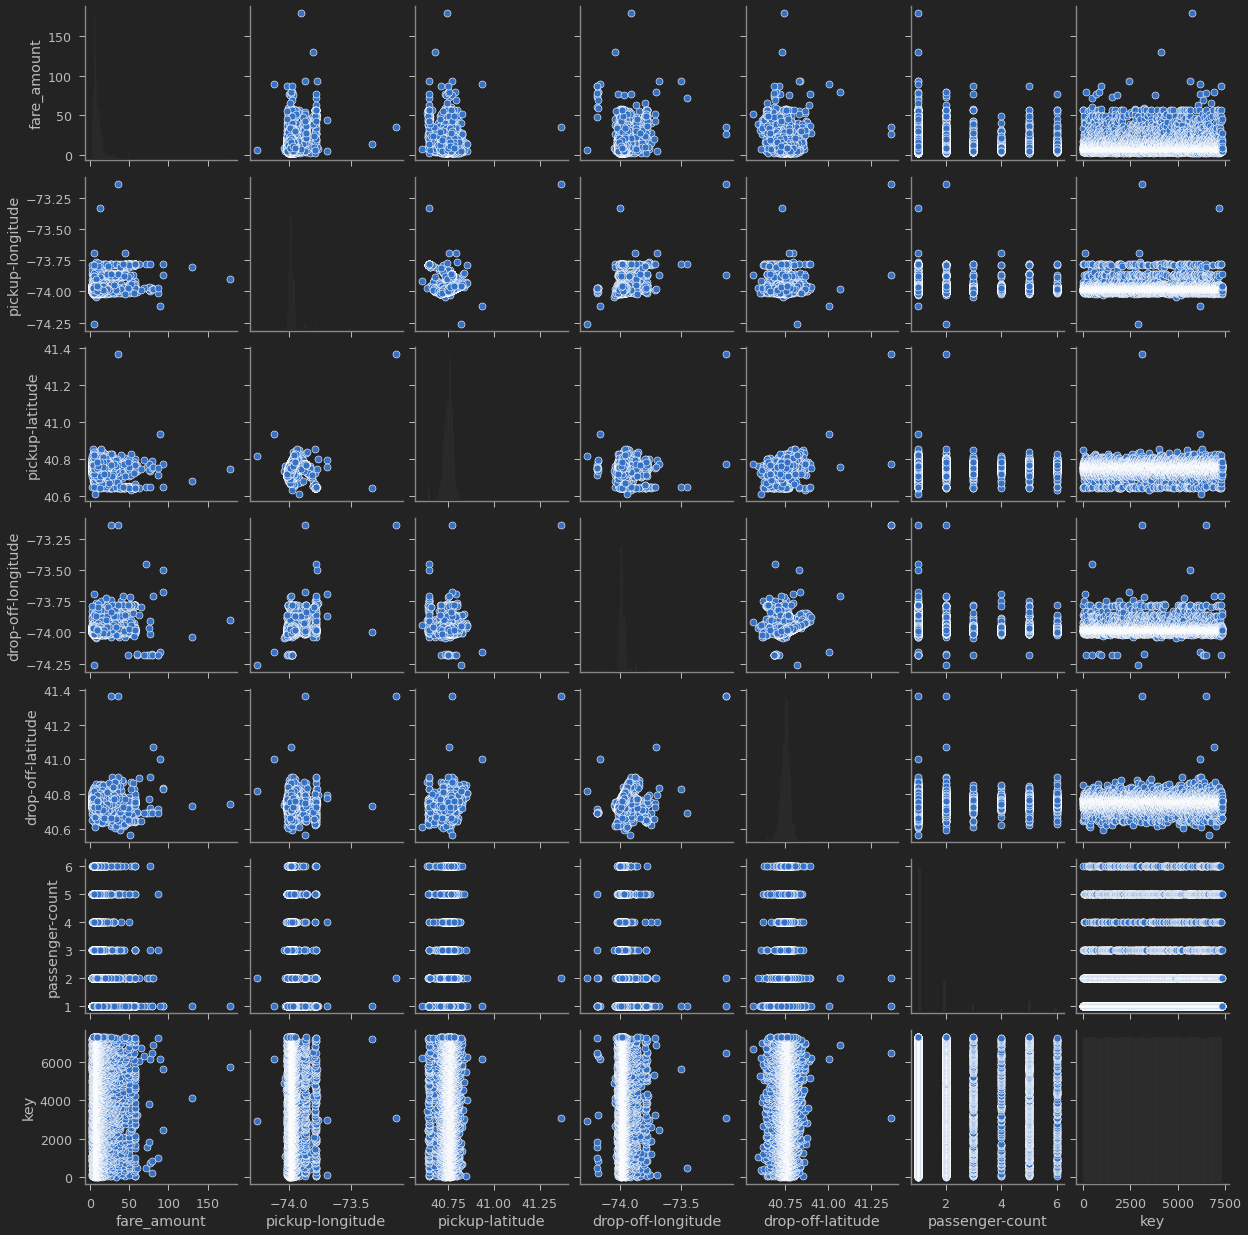

In [51]:
plt.figure(figsize=(30,30))
sns.pairplot(taxi_df)

<AxesSubplot:>

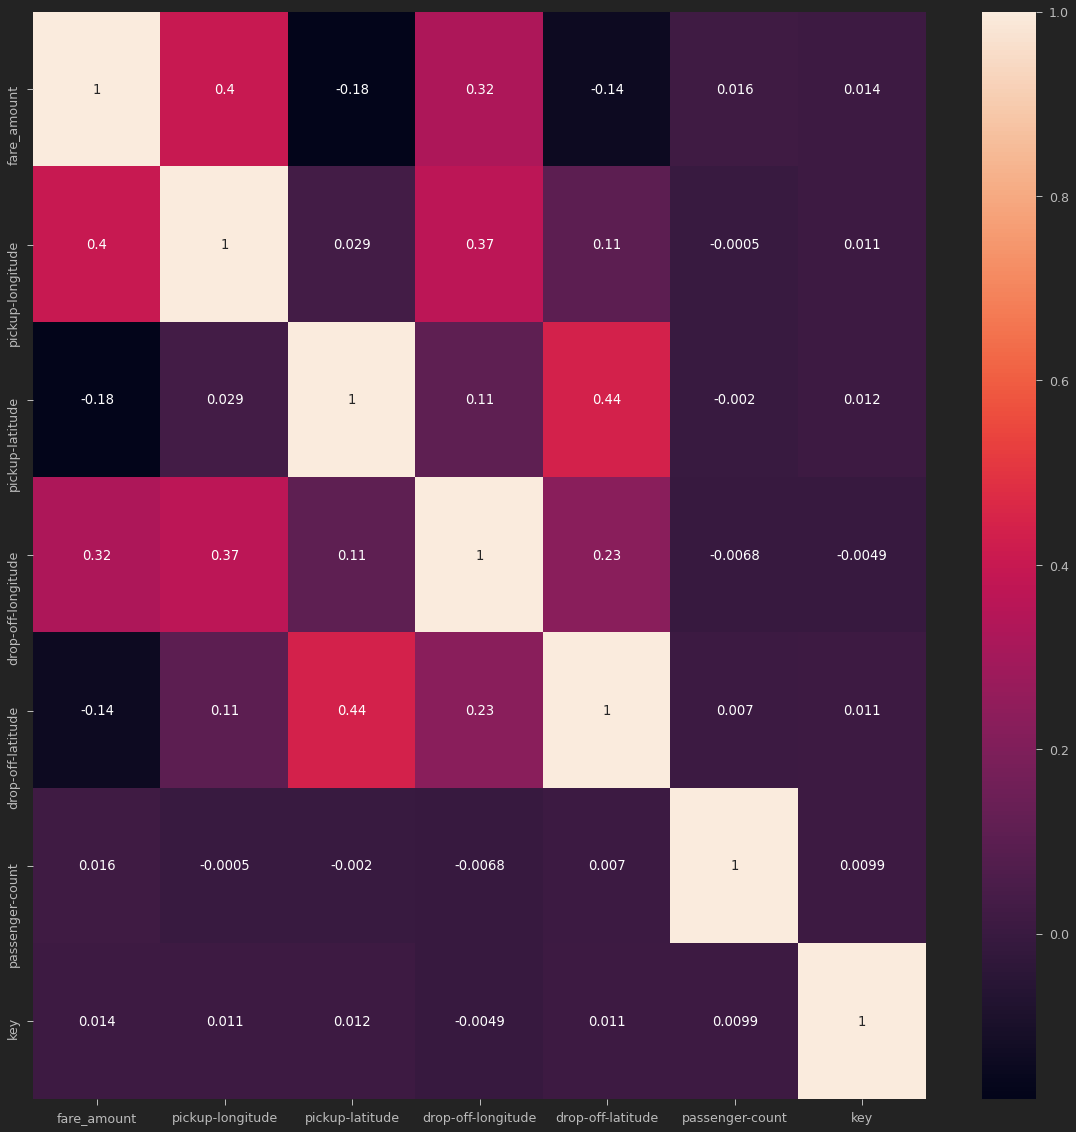

In [52]:
plt.figure(figsize=(20,20))
cm=taxi_df.corr()
sns.heatmap(cm,annot=True)

# Use tf.data to read csv files

In [28]:
# Defining the feature names into a list `CSV_COLUMNS`
CSV_COLUMNS = [
    'fare_amount',
    'pickup_datetime',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'passenger_count',
    'key'
]
LABEL_COLUMN = 'fare_amount'
# Defining the default values into a list `DEFAULTS`
DEFAULTS = [[0.0], ['na'], [0.0], [0.0], [0.0], [0.0], [0.0], ['na']]
UNWANTED_COLS = ['pickup_datetime', 'key']


def features_and_labels(row_data):
# The .pop() method will return item and drop from frame. 
    label = row_data.pop(LABEL_COLUMN)
    features = row_data
    
    for unwanted_col in UNWANTED_COLS:
        features.pop(unwanted_col)

    return features, label


def create_dataset(pattern, batch_size=1, mode='eval'):
# The tf.data.experimental.make_csv_dataset() method reads CSV files into a dataset
    dataset = tf.data.experimental.make_csv_dataset(
        pattern, batch_size, CSV_COLUMNS, DEFAULTS)

# The map() function executes a specified function for each item in an iterable.
# The item is sent to the function as a parameter.
    dataset = dataset.map(features_and_labels)

    if mode == 'train':
# The shuffle() method takes a sequence (list, string, or tuple) and reorganize the order of the items.
        dataset = dataset.shuffle(buffer_size=1000).repeat()

    # take advantage of multi-threading; 1=AUTOTUNE
    dataset = dataset.prefetch(1)
    return dataset

# Keras DNN model


In [29]:
# Defining the feature names into a list `INPUT_COLS`
INPUT_COLS = [
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'passenger_count',
]

# Create input layer of feature columns
feature_columns = {
    colname: tf.feature_column.numeric_column(colname)
    for colname in INPUT_COLS
    }

In [30]:
print(feature_columns.values())

dict_values([NumericColumn(key='pickup_longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='pickup_latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='dropoff_longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='dropoff_latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='passenger_count', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)])


In [31]:
model = Sequential([
    DenseFeatures(feature_columns=feature_columns.values()),
    Dense(units=32, activation="relu", name="h1"),
    Dense(units=8, activation="relu", name="h2"),
    Dense(units=1, activation="linear", name="output")
    ])

In [32]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

model.compile(optimizer="adam", loss="mse", metrics=[rmse, "mse"])

# Train The Model

In [33]:
TRAIN_BATCH_SIZE = 1000
NUM_TRAIN_EXAMPLES = 10000 * 5  # training dataset will repeat, wrap around
NUM_EVALS = 50  # how many times to evaluate
NUM_EVAL_EXAMPLES = 10000  # enough to get a reasonable sample

trainds = create_dataset(
    pattern='taxi-train*',
    batch_size=TRAIN_BATCH_SIZE,
    mode='train')

evalds = create_dataset(
    pattern='taxi-valid*',
    batch_size=1000,
    mode='eval').take(NUM_EVAL_EXAMPLES//1000)

In [34]:

%time 

steps_per_epoch = NUM_TRAIN_EXAMPLES // (TRAIN_BATCH_SIZE * NUM_EVALS)

LOGDIR = "taxi_trained"
# Train the sequential model
history = model.fit(x=trainds,
                    steps_per_epoch=steps_per_epoch,
                    epochs=NUM_EVALS,
                    validation_data=evalds,
                    callbacks=[TensorBoard(LOGDIR)])

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 20 µs
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/1 [==============================] - ETA: 0s - loss: 1418.9673 - rmse: 37.6692 - mse: 1418.9673WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'collections.OrderedDict'> input: OrderedDict([('pickup_longitude', <tf.Tensor 'ExpandDims_4:0' shape=(1000, 1) dtype=float32>), ('pickup_latitude', <tf.Tensor 'ExpandDims_3:0' shape=(1000, 1) dtype=float32>), ('dropoff_longitude', <tf.Tensor 'ExpandDims_1:0' shape=(1000, 1) dtype=float32>), ('dropoff_latitude', <tf.Tensor 'ExpandDims:0' shape=(1000, 1) dtype=float32>), ('passenger_count', <tf.Tensor 'ExpandDims_2:0' shape=(1000, 1) dtype=float32>)])
Consider rewriting this model with the Functional API.
1/1 [==============================] - 46s 46s/step - loss: 1418.9673 - rmse: 37.6692 - mse: 1

1/1 [==============================] - 1s 1s/step - loss: 95.5028 - rmse: 9.7726 - mse: 95.5028 - val_loss: 112.5207 - val_rmse: 10.5806 - val_mse: 112.5207
Epoch 37/50
1/1 [==============================] - 1s 564ms/step - loss: 72.1342 - rmse: 8.4932 - mse: 72.1342 - val_loss: 112.1614 - val_rmse: 10.5807 - val_mse: 112.1614
Epoch 38/50
1/1 [==============================] - 1s 648ms/step - loss: 107.5786 - rmse: 10.3720 - mse: 107.5786 - val_loss: 111.0803 - val_rmse: 10.5318 - val_mse: 111.0803
Epoch 39/50
1/1 [==============================] - 0s 384ms/step - loss: 83.8332 - rmse: 9.1560 - mse: 83.8332 - val_loss: 112.5027 - val_rmse: 10.5990 - val_mse: 112.5027
Epoch 40/50
1/1 [==============================] - 0s 354ms/step - loss: 88.0419 - rmse: 9.3831 - mse: 88.0419 - val_loss: 113.7807 - val_rmse: 10.6596 - val_mse: 113.7807
Epoch 41/50
1/1 [==============================] - 1s 743ms/step - loss: 90.5131 - rmse: 9.5138 - mse: 90.5131 - val_loss: 114.4432 - val_rmse: 10.6655 

# High level model evaluation

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_1 (DenseFeatu multiple                  0         
_________________________________________________________________
h1 (Dense)                   multiple                  192       
_________________________________________________________________
h2 (Dense)                   multiple                  264       
_________________________________________________________________
output (Dense)               multiple                  9         
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

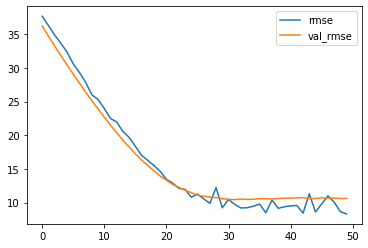

In [36]:
RMSE_COLS = ['rmse', 'val_rmse']

# The history object is returned from calls to the fit() function used to train the model.
# Metrics are stored in a dictionary in the history member of the object returned.
pd.DataFrame(history.history)[RMSE_COLS].plot()

<AxesSubplot:>

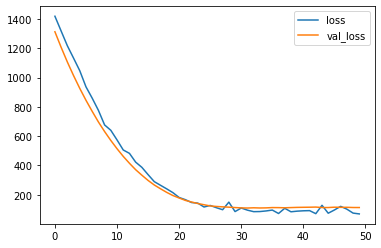

In [37]:
LOSS_COLS = ['loss', 'val_loss']

# The history object is returned from calls to the fit() function used to train the model.
# Metrics are stored in a dictionary in the history member of the object returned.
pd.DataFrame(history.history)[LOSS_COLS].plot()

In [38]:
# The predict() method will predict the response for model. 
# Using tf.convert_to_tensor() we will convert the given value to a Tensor. 
model.predict(x={"pickup_longitude": tf.convert_to_tensor([-73.982683]),
                 "pickup_latitude": tf.convert_to_tensor([40.742104]),
                 "dropoff_longitude": tf.convert_to_tensor([-73.983766]),
                 "dropoff_latitude": tf.convert_to_tensor([40.755174]),
                 "passenger_count": tf.convert_to_tensor([3.0])},
              steps=1)

Consider rewriting this model with the Functional API.


array([[10.127879]], dtype=float32)